In [1]:
import numpy as np
import cv2
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from numpy import savetxt
import shutil
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Mean of RGB for 4700 Nromal images with k=3

In [160]:
diff_0_1 = []
diff_0_2 = []
path = glob.glob("D:/5FH/ML/images/clean-normal-small-clustered-centers-3/*.npy")
i = 0
for file in tqdm(path):
    if (file == "D:/5FH/ML/images/clean-normal-clustered-centers-5\\MyRecord2021-11-19T101958061.avi-img-123011.jpg.npy"):
        continue
    if (file == "D:/5FH/ML/images/clean-normal-clustered-centers-5\\MyRecord2021-11-19T101958061.avi-img-30381.jpg.npy"):
        continue
    X = np.load(file, allow_pickle=True)
    means = np.mean(X, axis=1)
    sorted_means = np.uint(np.asarray(np.sort(means)))
    diff_0_1.append(sorted_means[1] - sorted_means[0])
    diff_0_2.append(sorted_means[2] - sorted_means[0])
    i += 1

100%|████████████████████████████████████████████████████████████████████████████| 4636/4636 [00:01<00:00, 2716.11it/s]


In [161]:
print(len(diff_0_1))
print(len(diff_0_2))

print(np.amax(diff_0_1))
print(np.amax(diff_0_2))
rr = np.asarray(diff_0_1)
dd = np.asarray(diff_0_2)

print(len(rr[rr > 40]))
print(len(dd[dd > 90]))
print(np.shape(diff_0_1))

4636
4636
42
100
6
75
(4636,)


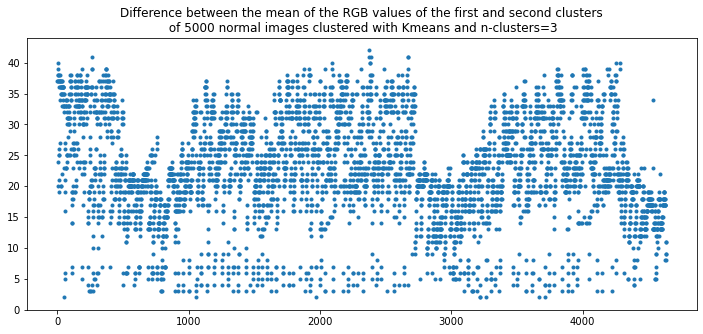

In [162]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

diff_0_1 = np.asarray(diff_0_1)

x = range(len(diff_0_1))
y = diff_0_1
ax.set_title("Difference between the mean of the RGB values of the first and second clusters\n of 5000 normal images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=1)
plt.show()

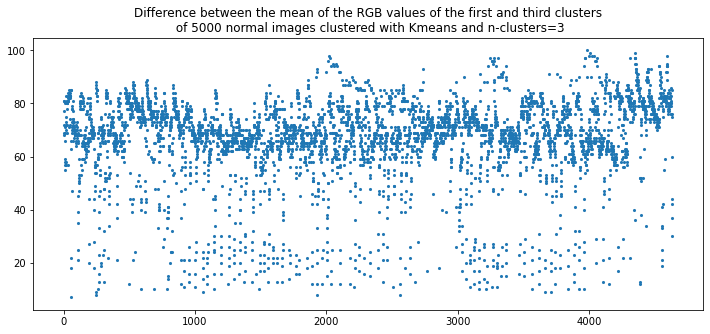

In [164]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

diff_0_2 = np.asarray(diff_0_2)

x = range(len(diff_0_2))
y = diff_0_2
ax.set_title("Difference between the mean of the RGB values of the first and third clusters\n of 5000 normal images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
plt.show()

<br><br>
## Mean of RGB for 6600 Nromal images with k=5

In [140]:
diff_0_1 = []
diff_0_2 = []
path = glob.glob("D:/5FH/ML/images/clean-normal-clustered-centers-5/*.npy")
i = 0
for file in tqdm(path):
    if (file == "D:/5FH/ML/images/clean-normal-clustered-centers-5\\MyRecord2021-11-19T101958061.avi-img-123011.jpg.npy"):
        continue
    if (file == "D:/5FH/ML/images/clean-normal-clustered-centers-5\\MyRecord2021-11-19T101958061.avi-img-30381.jpg.npy"):
        continue
    if i % 6 == 0:        
        X = np.load(file, allow_pickle=True)
        means = np.mean(X, axis=1)
        sorted_means = np.uint(np.asarray(np.sort(means)))
        diff_0_1.append(sorted_means[1] - sorted_means[0])
        diff_0_2.append(sorted_means[2] - sorted_means[0])
    i += 1

100%|█████████████████████████████████████████████████████████████████████████| 39623/39623 [00:02<00:00, 16282.23it/s]


In [141]:
print(len(diff_0_1))
print(len(diff_0_2))

print("max_0_1: " + str(np.amax(diff_0_1)))
print("max_0_2: " + str(np.amax(diff_0_2)))
rr = np.asarray(diff_0_1)
dd = np.asarray(diff_0_2)

print(len(rr[rr > 20]))
print(len(dd[dd > 50]))

6604
6604
max_0_1: 95
max_0_2: 104
5
2


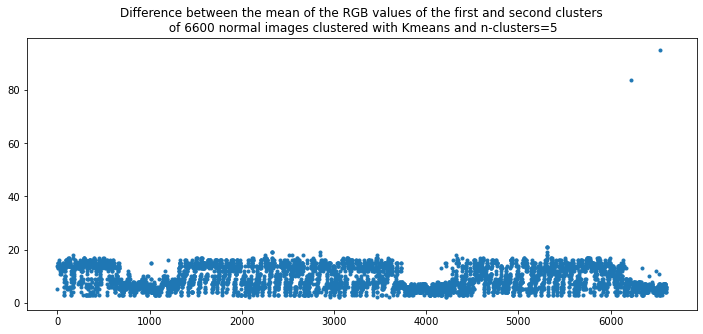

In [144]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

diff_0_1 = np.asarray(diff_0_1)

x = range(len(diff_0_1))
y = diff_0_1
ax.set_title("Difference between the mean of the RGB values of the first and second clusters\n of 6600 normal images clustered with Kmeans and n-clusters=5")
ax.scatter(x, y, marker='.',  linewidths=1)
plt.show()

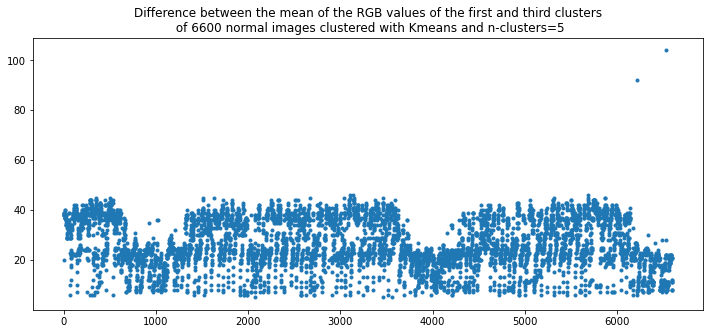

In [145]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

diff_0_2 = np.asarray(diff_0_2)

x = range(len(diff_0_2))
y = diff_0_2
ax.set_title("Difference between the mean of the RGB values of the first and third clusters\n of 6600 normal images clustered with Kmeans and n-clusters=5")
ax.scatter(x, y, marker='.',  linewidths=1)
plt.show()


<br><br>
## Mean of RGB for 6200 fail images with k=3

In [19]:
diff_0_1 = []
diff_0_2 = []
path = glob.glob("D:/5FH/ML/images/clean-fail-clustered-centers-3/*.npy")

for file in tqdm(path):
    X = np.load(file, allow_pickle=True)
    means = np.mean(X, axis=1)
    sorted_means = np.uint(np.asarray(np.sort(means)))
    diff_0_1.append(sorted_means[1] - sorted_means[0])
    diff_0_2.append(sorted_means[2] - sorted_means[0])

100%|████████████████████████████████████████████████████████████████████████████| 6191/6191 [00:02<00:00, 2276.89it/s]


In [20]:
print(len(diff_0_1))
print(len(diff_0_2))

print(np.amin(diff_0_1))
print(np.amin(diff_0_2))
rr = np.asarray(diff_0_1)
dd = np.asarray(diff_0_2)

print(len(rr[rr < 40]))
print(len(dd[dd < 90]))

6191
6191
7
18
5375
5498


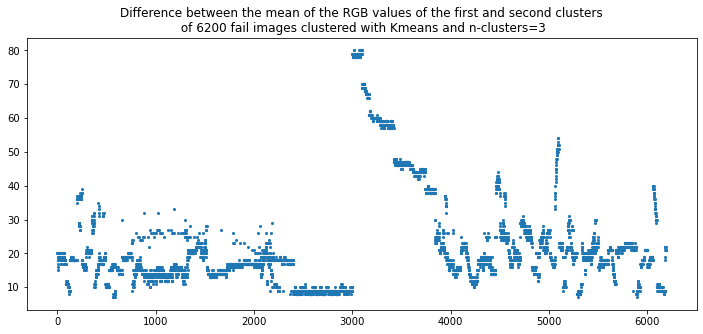

In [10]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

diff_0_1 = np.asarray(diff_0_1)

x = range(len(diff_0_1))
y = diff_0_1
ax.set_title("Difference between the mean of the RGB values of the first and second clusters\n of 6200 fail images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
plt.show()

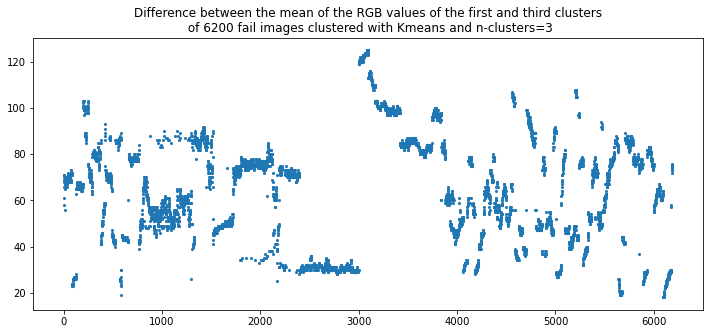

In [11]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

diff_0_2 = np.asarray(diff_0_2)

x = range(len(diff_0_2))
y = diff_0_2
ax.set_title("Difference between the mean of the RGB values of the first and third clusters\n of 6200 fail images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
plt.show()


<br><br>
## Mean of RGB for 6200 fail images with k=5

In [21]:
diff_0_1 = []
diff_0_2 = []
path = glob.glob("D:/5FH/ML/images/clean-fail-clustered-centers-5/*.npy")

for file in tqdm(path):
    X = np.load(file, allow_pickle=True)
    means = np.mean(X, axis=1)
    sorted_means = np.uint(np.asarray(np.sort(means)))
    diff_0_1.append(sorted_means[1] - sorted_means[0])
    diff_0_2.append(sorted_means[2] - sorted_means[0])

100%|████████████████████████████████████████████████████████████████████████████| 6191/6191 [00:02<00:00, 2200.32it/s]


In [22]:
print(len(diff_0_1))
print(len(diff_0_2))

print(np.amin(diff_0_1))
print(np.amin(diff_0_2))
rr = np.asarray(diff_0_1)
dd = np.asarray(diff_0_2)

print(len(rr[rr < 20]))
print(len(dd[dd < 50]))

6191
6191
3
10
4420
5316


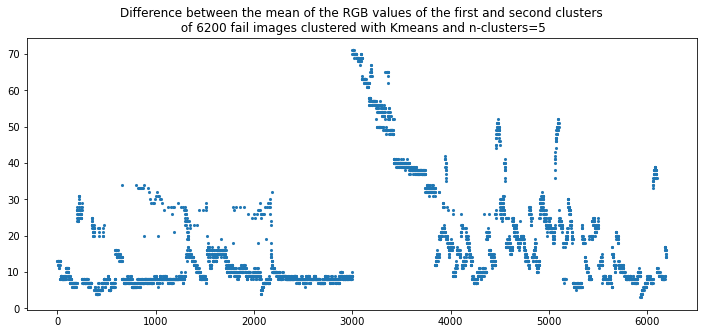

In [17]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

diff_0_1 = np.asarray(diff_0_1)

x = range(len(diff_0_1))
y = diff_0_1
ax.set_title("Difference between the mean of the RGB values of the first and second clusters\n of 6200 fail images clustered with Kmeans and n-clusters=5")
ax.scatter(x, y, marker='.',  linewidths=0.1)
plt.show()

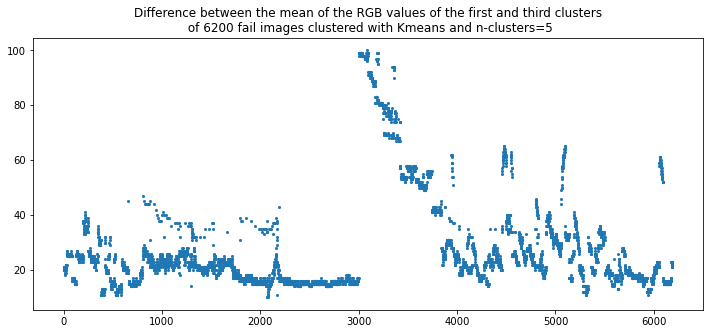

In [18]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

diff_0_2 = np.asarray(diff_0_2)

x = range(len(diff_0_2))
y = diff_0_2
ax.set_title("Difference between the mean of the RGB values of the first and third clusters\n of 6200 fail images clustered with Kmeans and n-clusters=5")
ax.scatter(x, y, marker='.',  linewidths=0.1)
plt.show()

<br><br>
## Approval why mean of RGB is not efficient

In [174]:
diff_0_1 = []
diff_0_2 = []
X = np.load("D:/5FH/ML/images/clean-fail-clustered-centers-3/MyRecord2021-11-19T125431028.avi-img-131536.jpg.npy")
means = np.mean(X, axis=1)
sorted_means = np.sort(means)
diff_0_1.append(sorted_means[1] - sorted_means[0])
diff_0_2.append(sorted_means[2] - sorted_means[0])
sorted_clusters = []
for i in range(0,3):
    for j in range(0,3):
        if sorted_means[i] == means[j]:
            sorted_clusters.append(X[j])
            break
print(np.uint(X))
print(np.uint(np.asarray(sorted_clusters)))

[[200  37 116]
 [250 183  14]
 [241 101  37]]
[[200  37 116]
 [241 101  37]
 [250 183  14]]
